In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from _data import *

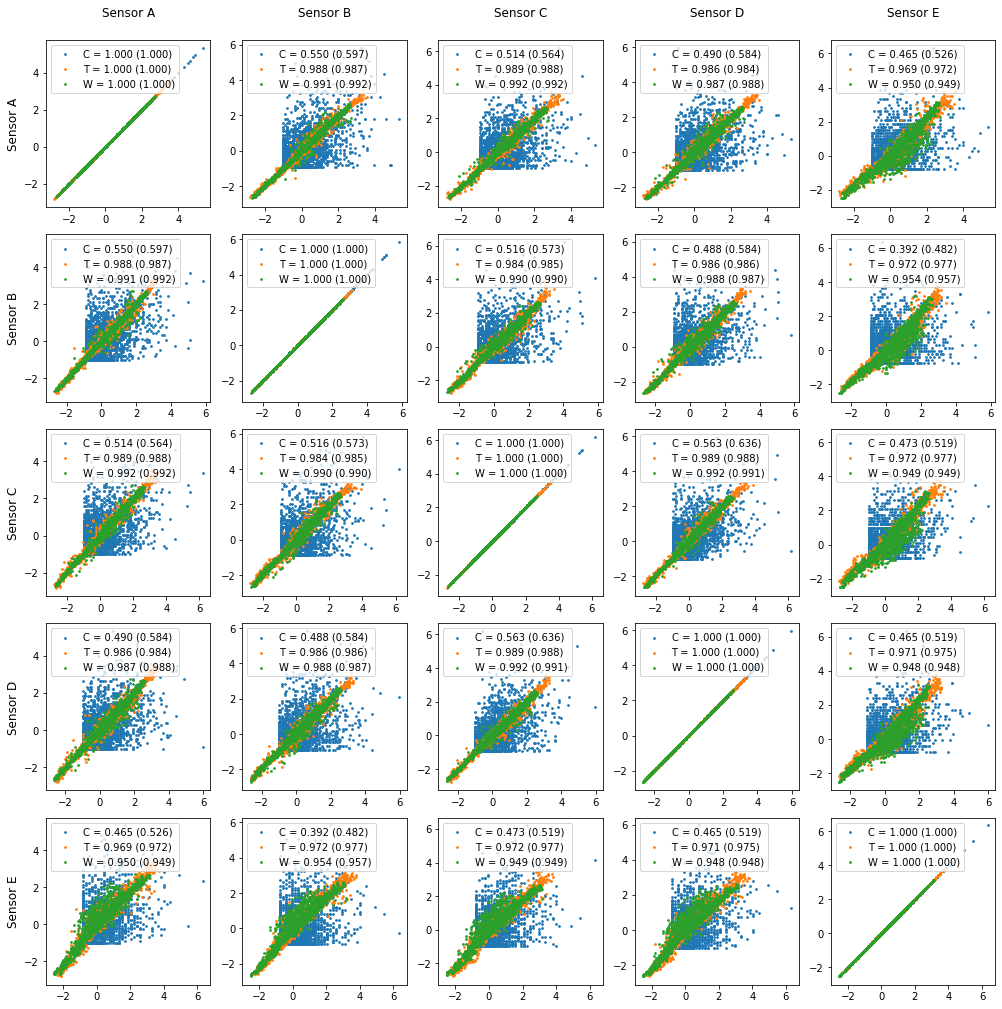

In [2]:
variables = ['Crosswind Speed', 'Temperature', 'WBGT']
fig = plt.figure(figsize=(14,14))

for i, (sensor_name1, sensor1) in enumerate(data.items()):
  for j, (sensor_name2, sensor2) in enumerate(data.items()):
    ax = plt.subplot2grid((5,5), (i,j))
    
    for variable in variables: 
      val1 = sensor1[variable]['values']
      val2 = sensor2[variable]['values'] 

      # normalize - variables can have diff. units and array lengths
      norm = lambda x: (x - x.mean()) / x.std()
      val1, val2 = norm(val1), norm(val2)
      val1, val2 = zip(*zip(val1, val2))

      pears = stats.pearsonr(val1, val2)[0]
      spear = stats.spearmanr(val1, val2)[0]
      
      ax.scatter(val1, val2, s=3,
                 label='%s = %.3f (%.3f)' % (variable[:1], pears, spear))
      ax.legend(loc='upper left')
      
      if j == 0:
        ax.set_ylabel(sensor_name1, fontsize=12)      
      if i == 0:
        ax.set_xlabel(sensor_name2, fontsize=12)
        ax.xaxis.set_label_coords(0.5, 1.2)


plt.tight_layout(pad=1.0)
plt.legend()
plt.show()